<a href="https://colab.research.google.com/github/Ashraf1292/Thesis-Fake_jobs-/blob/main/SMOTE%2BENN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         descrip

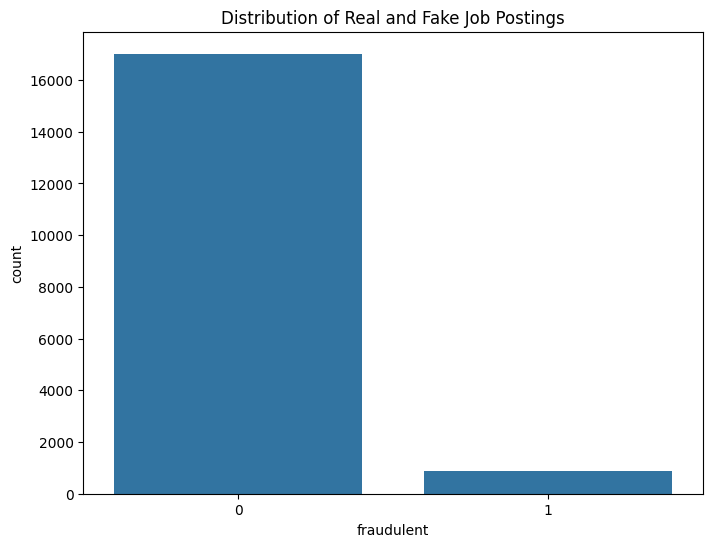


Model Performance:
Accuracy: 98.49%
Precision: 88.89%
Recall: 78.61%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.89      0.79      0.83       173

    accuracy                           0.98      3576
   macro avg       0.94      0.89      0.91      3576
weighted avg       0.98      0.98      0.98      3576


Best Hyperparameters: {'C': 10}
Best Cross-Validation Accuracy: 0.9867570984680635


NameError: name 'confusion_matrix' is not defined

<Figure size 800x600 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('fake_job_postings.csv')

# Step 2: Exploratory Data Analysis (EDA)
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Check the distribution of real and fake job postings
print("\nClass Distribution:")
print(df['fraudulent'].value_counts())

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Real and Fake Job Postings')
plt.show()

# Step 3: Feature Engineering
# Combine text columns with proper handling of missing values
df['text'] = (
    df['title'].fillna('') + ' ' +
    df['location'].fillna('') + ' ' +
    df['department'].fillna('') + ' ' +
    df['company_profile'].fillna('') + ' ' +
    df['description'].fillna('') + ' ' +
    df['requirements'].fillna('') + ' ' +
    df['benefits'].fillna('')
)

# Drop unnecessary columns
df = df[['text', 'fraudulent']]

# Step 4: Text Preprocessing
df.loc[:, 'text'] = df['text'].str.lower()
df.loc[:, 'text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df = df[df['text'] != ""]

# Step 5: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['fraudulent']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Oversampling using ADASYN
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

# Step 8: Train the Linear SVC model
svc = LinearSVC(random_state=42)
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)
best_svc = grid_search.best_estimator_

# Step 9: Evaluate the model
y_pred = best_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Dataset Head:
   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         descrip

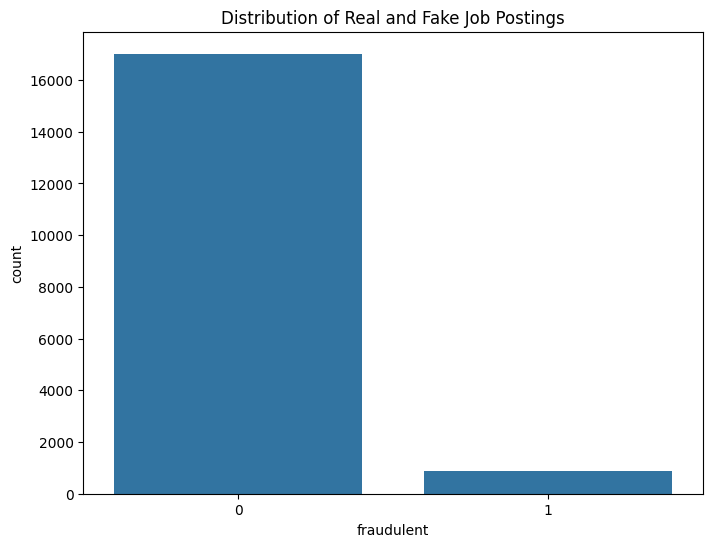


Applying ADASYN oversampling...
Class distribution after ADASYN: [13611 13572]

Applying ENN cleaning...
Final class distribution after ENN: [10028 13572]

Model Performance:
Accuracy: 96.84%
Precision: 62.10%
Recall: 89.02%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.62      0.89      0.73       173

    accuracy                           0.97      3576
   macro avg       0.81      0.93      0.86      3576
weighted avg       0.98      0.97      0.97      3576


Best Hyperparameters: {'C': 10}
Best Cross-Validation Accuracy: 0.9923728813559322


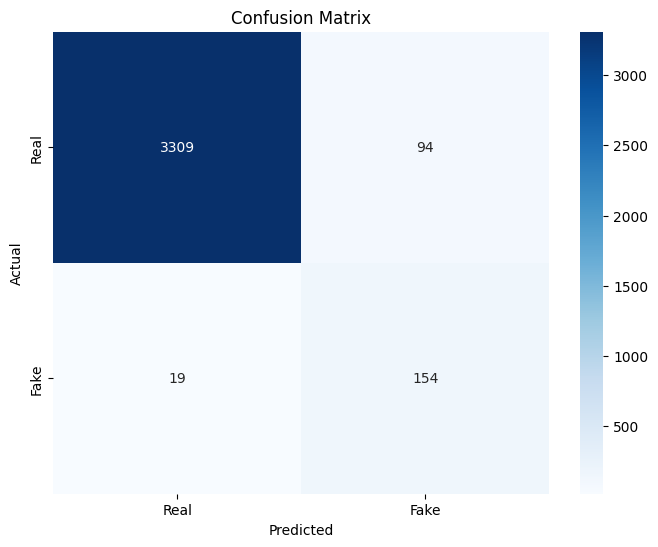

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import EditedNearestNeighbours
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('fake_job_postings.csv')

# Step 2: Exploratory Data Analysis (EDA)
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Check the distribution of real and fake job postings
print("\nClass Distribution:")
print(df['fraudulent'].value_counts())

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Real and Fake Job Postings')
plt.show()

# Step 3: Feature Engineering
# Combine text columns with proper handling of missing values
df['text'] = (
    df['title'].fillna('') + ' ' +
    df['location'].fillna('') + ' ' +
    df['department'].fillna('') + ' ' +
    df['company_profile'].fillna('') + ' ' +
    df['description'].fillna('') + ' ' +
    df['requirements'].fillna('') + ' ' +
    df['benefits'].fillna('')
)

# Drop unnecessary columns
df = df[['text', 'fraudulent']]

# Step 4: Text Preprocessing
df.loc[:, 'text'] = df['text'].str.lower()
df.loc[:, 'text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df = df[df['text'] != ""]

# Step 5: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['fraudulent']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Resampling using ADASYN followed by ENN
# First apply ADASYN oversampling
print("\nApplying ADASYN oversampling...")
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print("Class distribution after ADASYN:", np.bincount(y_train_adasyn))

# Then apply ENN cleaning
print("\nApplying ENN cleaning...")
enn = EditedNearestNeighbours(n_neighbors=3)
X_train_resampled, y_train_resampled = enn.fit_resample(X_train_adasyn, y_train_adasyn)
print("Final class distribution after ENN:", np.bincount(y_train_resampled))

# Step 8: Train the Linear SVC model
svc = LinearSVC(random_state=42)
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
best_svc = grid_search.best_estimator_

# Step 9: Evaluate the model
y_pred = best_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Dataset Head:
   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         descrip

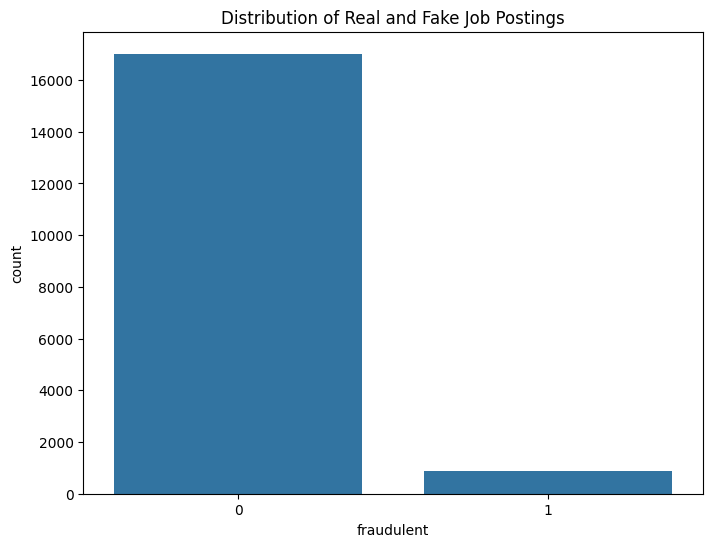


Applying ADASYN oversampling...
Class distribution after ADASYN: [13611 13572]

Applying ENN cleaning...
Final class distribution after ENN: [10028 13572]


KeyboardInterrupt: 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import EditedNearestNeighbours
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('fake_job_postings.csv')

# Step 2: Exploratory Data Analysis (EDA)
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Check the distribution of real and fake job postings
print("\nClass Distribution:")
print(df['fraudulent'].value_counts())

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Real and Fake Job Postings')
plt.show()

# Step 3: Feature Engineering
# Combine text columns with proper handling of missing values
df['text'] = (
    df['title'].fillna('') + ' ' +
    df['location'].fillna('') + ' ' +
    df['department'].fillna('') + ' ' +
    df['company_profile'].fillna('') + ' ' +
    df['description'].fillna('') + ' ' +
    df['requirements'].fillna('') + ' ' +
    df['benefits'].fillna('')
)

# Drop unnecessary columns
df = df[['text', 'fraudulent']]

# Step 4: Text Preprocessing
df.loc[:, 'text'] = df['text'].str.lower()
df.loc[:, 'text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df = df[df['text'] != ""]

# Step 5: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['fraudulent']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Resampling using ADASYN followed by ENN
# First apply ADASYN oversampling
print("\nApplying ADASYN oversampling...")
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print("Class distribution after ADASYN:", np.bincount(y_train_adasyn))

# Then apply ENN cleaning
print("\nApplying ENN cleaning...")
enn = EditedNearestNeighbours(n_neighbors=3)
X_train_resampled, y_train_resampled = enn.fit_resample(X_train_adasyn, y_train_adasyn)
print("Final class distribution after ENN:", np.bincount(y_train_resampled))

# Step 8: Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
best_rf = grid_search.best_estimator_

# Step 9: Evaluate the model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Analysis (new addition for Random Forest)
print("\nTop 20 Most Important Features:")
feature_importance = pd.DataFrame({
    'feature': tfidf.get_feature_names_out(),
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance.head(20))

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

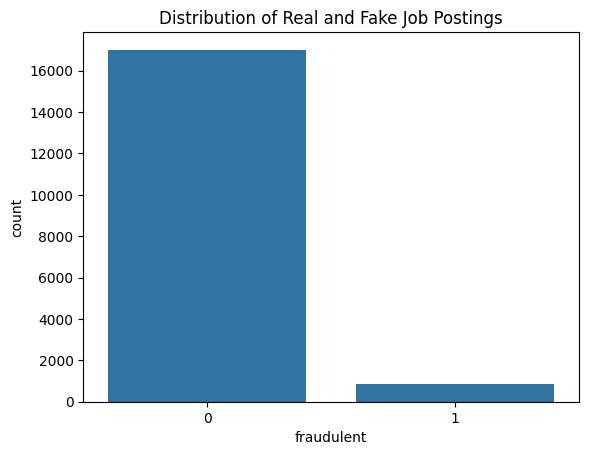

Accuracy of the Linear SVC model: 97.06%
Precision: 63.93%
Recall: 90.17%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.64      0.90      0.75       173

    accuracy                           0.97      3576
   macro avg       0.82      0.94      0.87      3576
weighted avg       0.98      0.97      0.97      3576

Best Hyperparameters: {'C': 10}
Best Cross-Validation Accuracy: 0.9992828961994272


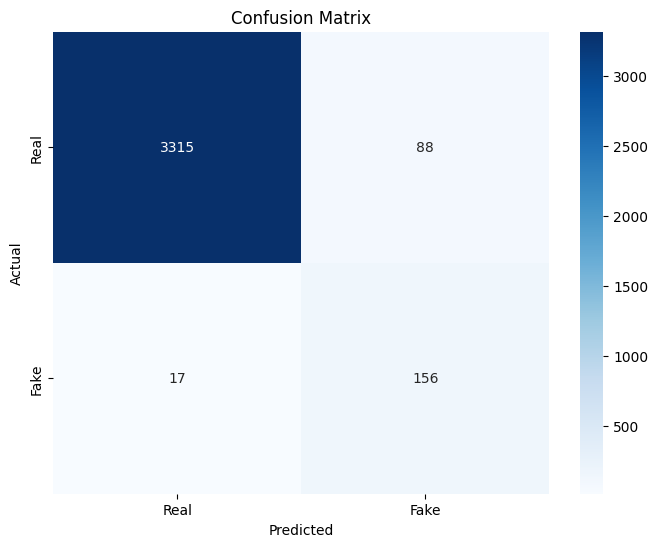

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN  # Corrected import
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('fake_job_postings.csv')

# Step 2: Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df['fraudulent'].value_counts())

# Visualize the distribution
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Real and Fake Job Postings')
plt.show()

# Step 3: Feature Engineering
df['text'] = df['title'].fillna('') + ' ' + \
            df['location'].fillna('') + ' ' + \
            df['department'].fillna('') + ' ' + \
            df['company_profile'].fillna('') + ' ' + \
            df['description'].fillna('') + ' ' + \
            df['requirements'].fillna('') + ' ' + \
            df['benefits'].fillna('')

# Drop unnecessary columns
df = df[['text', 'fraudulent']]

# Step 4: Text Preprocessing
df.loc[:, 'text'] = df['text'].str.lower()
df.loc[:, 'text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df = df[df['text'] != ""]

# Step 5: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['fraudulent']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Oversampling using SMOTEENN
smote_enn = SMOTEENN(random_state=42, n_jobs=-1)  # Corrected class name
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

# Step 8: Train the Linear SVC model
svc = LinearSVC(random_state=42)
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)
best_svc = grid_search.best_estimator_

# Step 9: Evaluate the model
y_pred = best_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy of the Linear SVC model: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Display results
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()